In [1]:
# Primeiro é preciso importar as bibliotecas necessarias para nossa analise exploratória
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from geopy.geocoders import Nominatim
import csv

In [2]:
# Leitura e carregamentos dos dados e posterior carregamento do data frame na variavel 'df'
data = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(data)
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# A coluna date do df continha caracteres que nao faziam sentido (T000000), os quais foram retirados da mesma
df['date'] = df['date'].str.replace('T000000', '')

In [4]:
#transformando os dados da coluna date, de string para o formato de data
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [5]:
# Transformando as colunas de latitude, longitude e zipcode para que possa ser usado o modulo 
#geopy posteriormente
df['lat'] = df['lat'].astype('str')
df['long'] = df['long'].astype('str')
df['zipcode'] = df['zipcode'].astype('str')


In [6]:
# criando a coluna de preço  por sqft
df['price/sqft_lot'] = df['price'] / df['sqft_lot']
df['price/sqft_living'] = df['price']/ df['sqft_living']

In [7]:
# Explorando as medidas de tendencia central e variancia do dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price/sqft_lot,price/sqft_living
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652,88.966710,264.156594
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631,94.055247,110.060793
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000,0.163119,87.588235
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000,33.333333,182.291667
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000,59.223301,244.644550
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000,107.594937,318.322981
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000,2027.208539,810.138889


In [8]:
# Começando a limpeza dos dados
df.drop(df[df['bedrooms'] == 33.000000].index, inplace=True)
no_bedrooms_or_bathrooms = df.loc[
    (df['bedrooms'] == 0.000000) |
    (df['bathrooms'] == 0.000000)
]
df.drop(no_bedrooms_or_bathrooms.index, inplace=True)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>]], dtype=object)

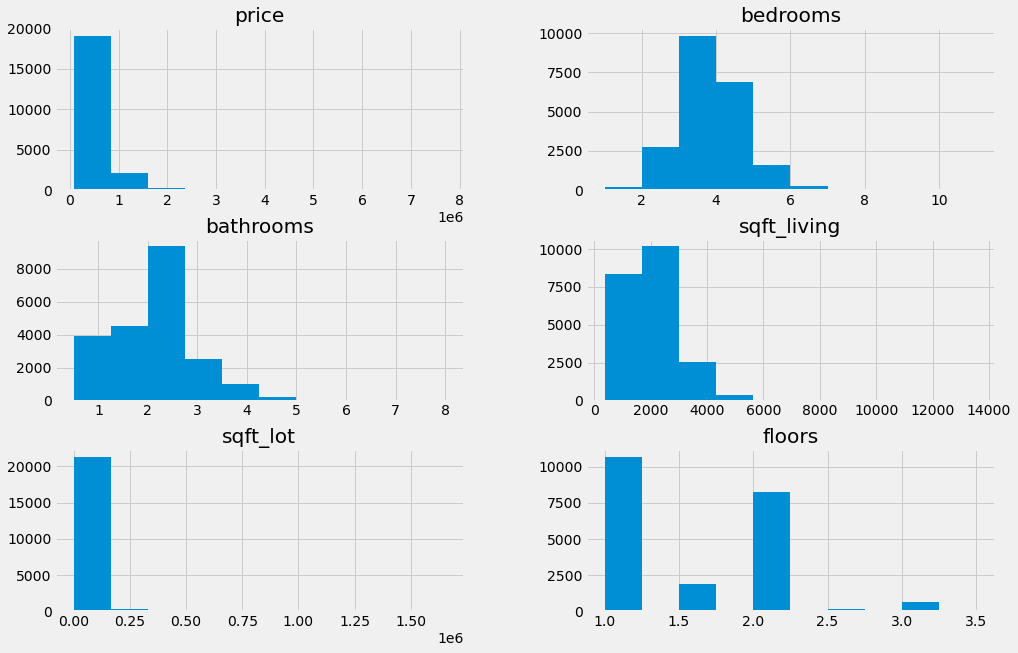

In [9]:
# Visualizaçao inicial
plt.style.use('fivethirtyeight')
df.hist(column=df.columns[2:8], figsize=(15,10))


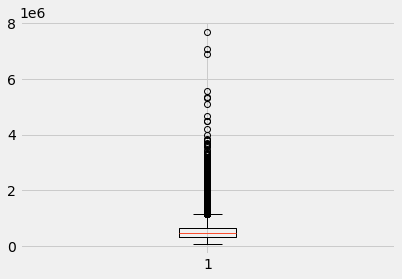

In [10]:
# Visualizando os outliers de 'price'
bp = plt.boxplot(df['price'])

In [11]:
# Removendo os outliers
bp.keys()
[item.get_ydata() for item in bp['caps']]
cap = df[df['price'] > 1027500]
df.drop(index=cap.index, inplace=True)

In [12]:
#repetindo o processo para as demais colunas relevantes para a analise
bathroom_ix = df[df['bathrooms'] > 4].index
df.drop(index=bathroom_ix, inplace=True)

In [13]:
bedroom_ix = (df[(df['bedrooms'] < 2) | (df['bedrooms'] > 5)]).index
df.drop(index=bedroom_ix, inplace=True)

In [14]:
sqft_living_ix = df[(df['sqft_living'] > 3900)].index
df.drop(index=sqft_living_ix, inplace=True)

In [15]:
grade_ix = df[(df['grade'] < 6) | (df['grade'] > 9)].index
df.drop(index=grade_ix, inplace=True)

In [16]:
sqft_above_ix = df[(df['sqft_above'] > 3192)].index
df.drop(index=sqft_above_ix, inplace=True)


In [17]:
sqft_living15_ix =( df[(df['sqft_living15'] > 3192)]).index

df.drop(index=sqft_living15_ix, inplace=True)

In [18]:
price_sqft_ix = df[(df['price/sqft_living'] > 504.5045045)].index
df.drop(index=price_sqft_ix, inplace=True)

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>]], dtype=object)

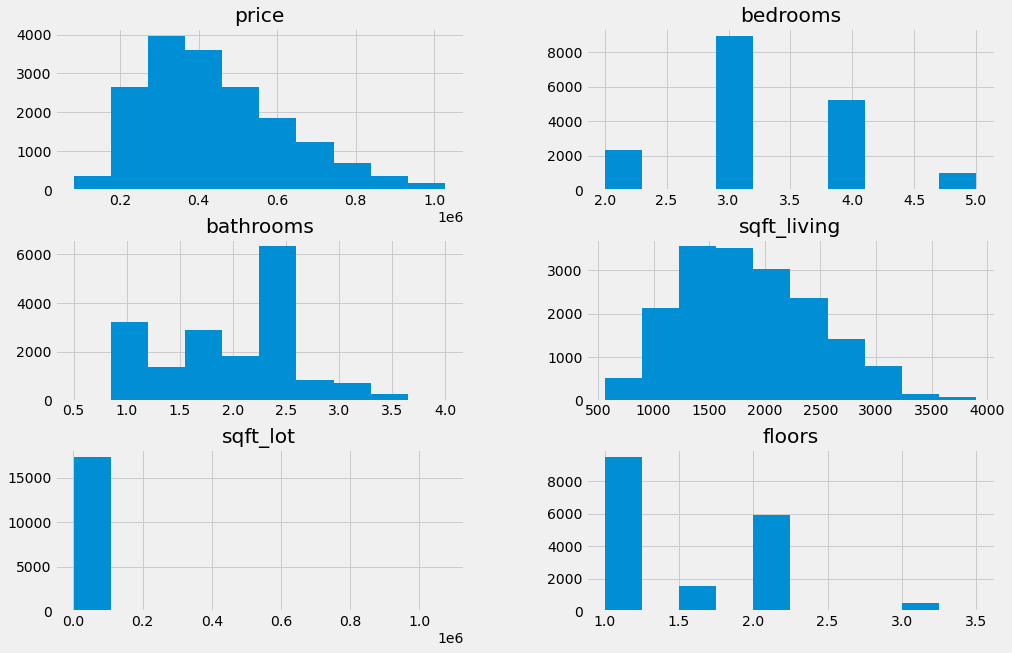

In [19]:
# Visualizando os dados apos a limpeza
plt.style.use('fivethirtyeight')
df.hist(column=df.columns[2:8], figsize=(15,10))


In [98]:
# Criando a coluna com a cidade de cada casa

geolocator = Nominatim(user_agent="geoapiExercises")

def get_city(df):
    cities = []
    for lat, longi in zip(df['lat'], df['long']):
        Latitude = lat
        Longitude = longi
        location = geolocator.reverse(Latitude+","+Longitude)
        address = location.raw['address']
        city = address.get('city', '')
        cities.append(city)
    np.array(cities)
    return cities

cities = get_city(df)
df['city'] = cities

In [20]:
data = pd.read_csv('clean_df.csv')
df = pd.DataFrame(data)

In [21]:
# Apos nova exploração dos dados, percebi que linhas da coluna city estavam vazias e que de 
#acordo com as coordenadas, todas essas casas eram localizadas na cidade de Des Moines, entao subistitui
#os valores vazios por Des Moines

df.loc[df['city'] == '', 'city'] = 'Des Moines'

In [22]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_lot,price/sqft_living,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,39.274336,188.050847,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,74.288870,209.338521,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,18.000000,233.766234,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,120.800000,308.163265,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,63.118812,303.571429,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,318.302387,235.294118,Seattle
17755,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,68.811285,173.160173,Seattle
17756,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,297.852593,394.216667,Seattle
17757,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,167.504188,250.000000,Des Moines


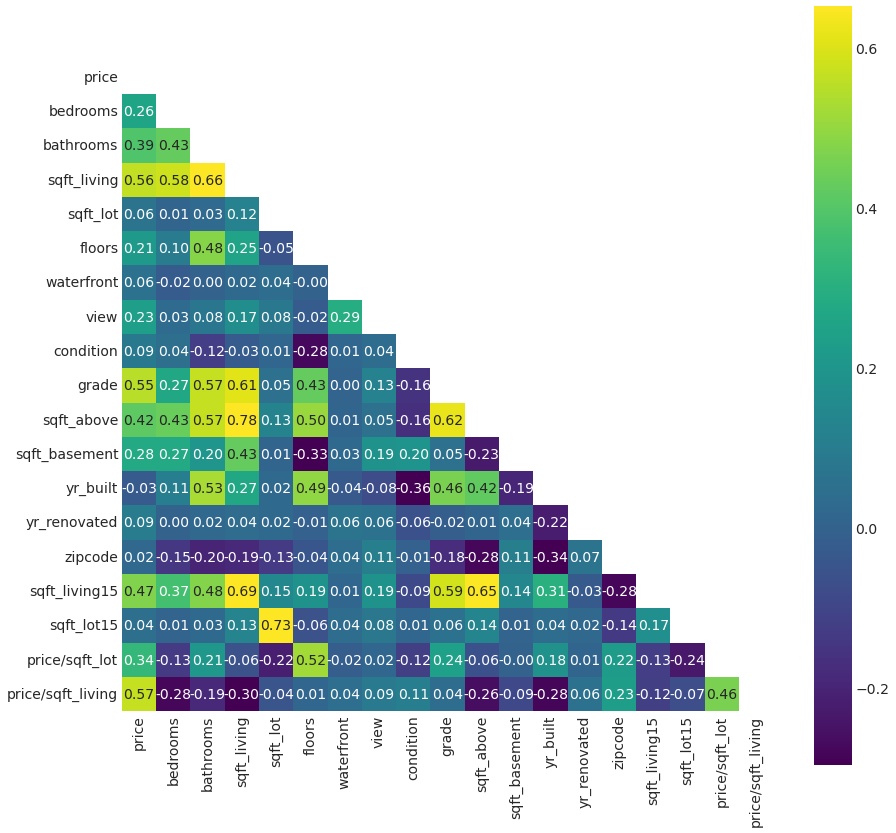

In [23]:
# Mapa de calor utilizando a matriz correlacional das grandezas
heat_map = df.drop(labels=['id', 'date', 'lat', 'long'], axis=1) #retirei as grandezas de localizaçao

heat_map_corr = heat_map.corr()
mask = np.zeros_like(heat_map_corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13,13))
    ax = sns.heatmap(heat_map_corr,mask=mask, square=True, annot=True, fmt='.2f', cmap='viridis', 
                     robust=True)


In [24]:
# visualização do preço do imovel em funçao da cidade
cities_grp = df.groupby(by='city', as_index=False).agg('mean').sort_values(by='price', ascending=True)
cities_grp.drop(columns=['yr_renovated','waterfront','id'], inplace=True)

<AxesSubplot:ylabel='city'>

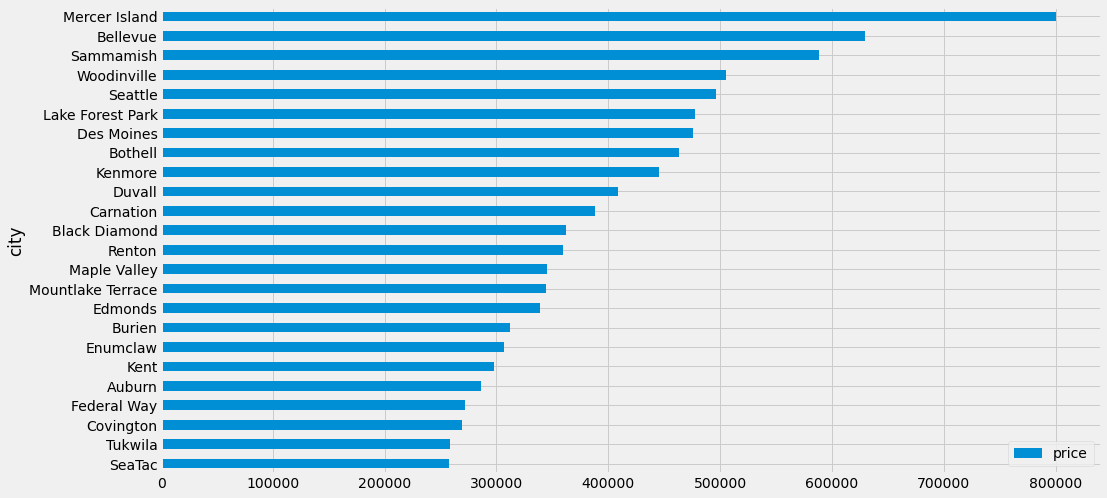

In [25]:
cities_grp.plot(x='city', y='price', kind='barh', figsize=(15,8), style='seaborn', legend='Avg price')

<AxesSubplot:ylabel='city'>

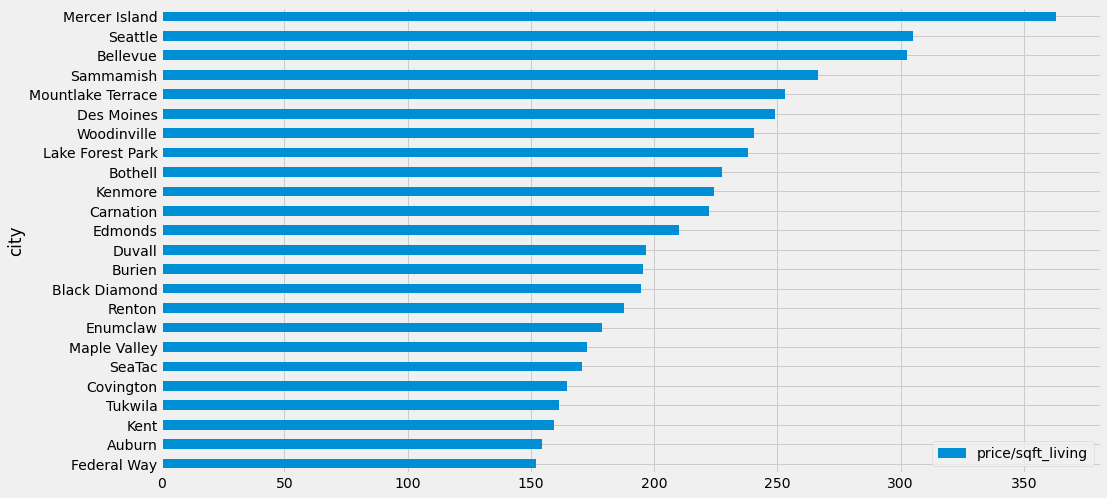

In [26]:
# visualização do preço por area do imovel em funçao da cidade
cities_grp.sort_values(by='price/sqft_living').plot(x='city', 
                y='price/sqft_living', kind='barh', figsize=(15,8))

In [27]:
# Identificando quais imoveis foram vendidos mais de uma vez
df['dupli_id'] = df.duplicated(subset=['id'], keep=False)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_lot,price/sqft_living,city,dupli_id
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,39.274336,188.050847,Seattle,False
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,74.288870,209.338521,Seattle,False
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,18.000000,233.766234,Kenmore,False
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,120.800000,308.163265,Seattle,False
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,63.118812,303.571429,Sammamish,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,318.302387,235.294118,Seattle,False
17755,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,68.811285,173.160173,Seattle,False
17756,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,297.852593,394.216667,Seattle,False
17757,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,167.504188,250.000000,Des Moines,False


In [76]:
# Encontrando o lucro/prejuízo para casas que foram vendidas mais de uma vez no periodo observado
dupli_grp = df.loc[df['dupli_id'] == True]
dupli_grp = dupli_grp.sort_values(by=['id', 'date'])
dupli_grp['diff'] = df.groupby(['id'])['price'].diff().fillna(0)
dupli_grp = dupli_grp.sort_values(by=['diff'], ascending=False)

In [72]:
# Visualizando as casas com maior lucro na segunda venda
dupli_grp.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_lot,price/sqft_living,city,dupli_id,diff
2725,7409700215,2015-03-13,921500.0,3,1.50,1900,5000,1.5,0,0,3,7,1640,260,1926,0,98115,47.6779,-122.294,2090,5000,184.300000,485.000000,Seattle,True,371500.0
9126,6141100320,2015-02-13,570000.0,2,1.00,1500,6685,1.0,0,0,3,7,1190,310,1926,0,98133,47.7186,-122.354,1420,6561,85.265520,380.000000,Seattle,True,325000.0
5684,5249801440,2015-04-22,570000.0,3,1.00,1660,7650,1.5,0,0,3,7,1350,310,1910,0,98118,47.5576,-122.277,1750,5760,74.509804,343.373494,Seattle,True,320000.0
2072,1781500435,2015-02-25,575000.0,3,1.75,1580,7344,1.0,0,0,5,7,1580,0,1911,0,98126,47.5256,-122.380,1580,6207,78.295207,363.924051,Seattle,True,315000.0
7342,5282200015,2015-01-26,840000.0,5,3.00,2750,3800,1.5,0,0,5,7,1750,1000,1926,0,98115,47.6845,-122.313,1900,3800,221.052632,305.454545,Seattle,True,315000.0
9054,3271300955,2015-02-24,868000.0,4,2.50,2020,4350,2.0,0,0,5,9,1730,290,1943,0,98199,47.6503,-122.410,1620,5800,199.540230,429.702970,Seattle,True,313271.0
13054,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0,0,3,6,1430,0,1947,0,98118,47.5192,-122.266,1860,5980,78.571429,307.692308,Seattle,True,307000.0
7778,4302201085,2015-05-06,546940.0,3,1.00,1470,7680,1.0,0,0,3,7,1220,250,1946,0,98106,47.5276,-122.359,1470,6784,71.216146,372.068027,Seattle,True,298940.0
4680,3578401060,2015-05-04,625000.0,3,2.25,1920,9672,2.0,0,0,4,8,1920,0,1984,0,98074,47.6233,-122.046,1950,10125,64.619520,325.520833,Sammamish,True,280000.0
12512,7961500010,2015-03-04,520000.0,3,2.25,2210,10794,1.0,0,0,3,7,1540,670,1967,0,98178,47.4911,-122.224,2230,10753,48.174912,235.294118,Seattle,True,275000.0


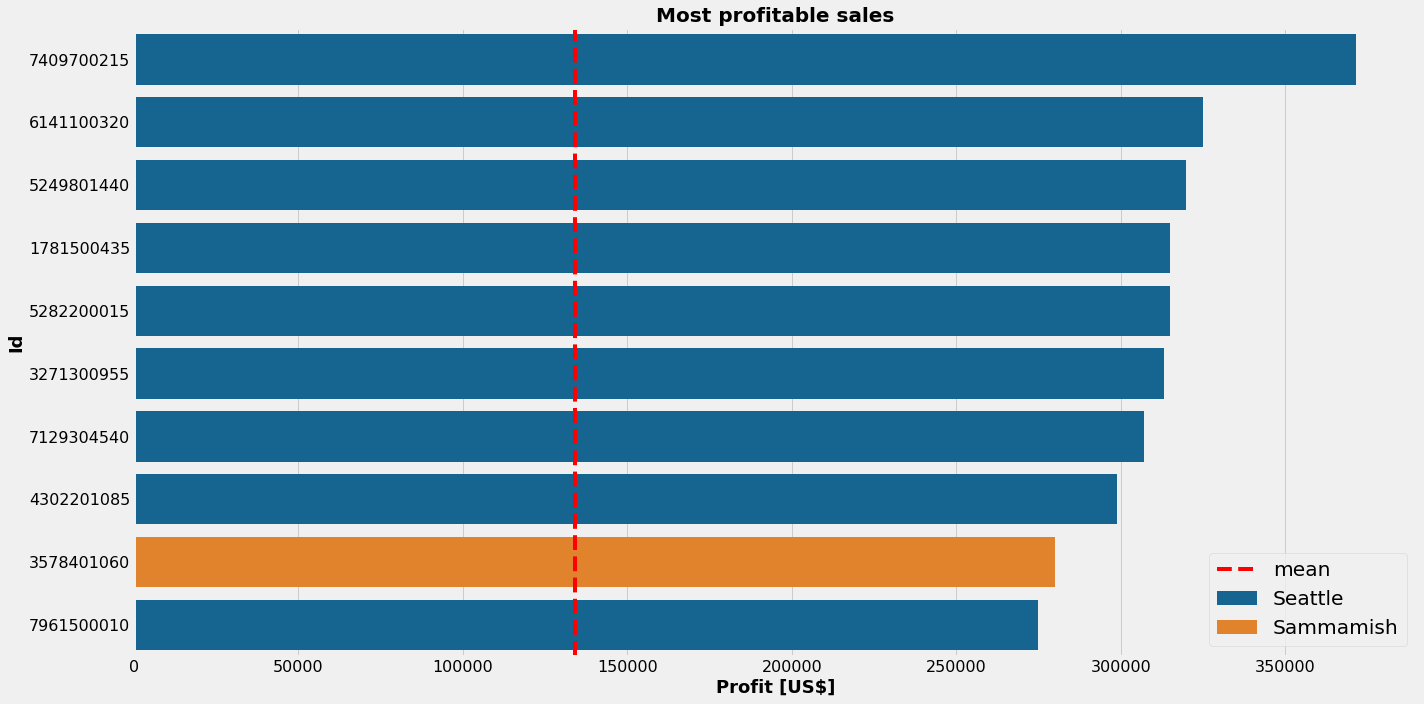

In [142]:
# Grafico de barras das casas com maior lucro na venda 
data_barplot = dupli_grp.iloc[0:10,:]
order_list = data_barplot['id']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))

ax = sns.barplot(x='diff', y='id', hue='city', 
                 data=data_barplot, orient='h', order=order_list, dodge=False)

plt.title(label='Most profitable sales', fontweight='bold', fontsize=20)
plt.xlabel(xlabel='Profit [US$]', fontweight='bold', fontsize=18)
plt.ylabel(ylabel='Id', fontweight='bold', fontsize=18)
plt.tick_params(labelsize=16)
plt.axvline(x=134042.83823529413, color='r', linestyle='--', label='mean')
plt.legend(loc=4, fontsize='x-large')
plt.tight_layout()
plt.show()

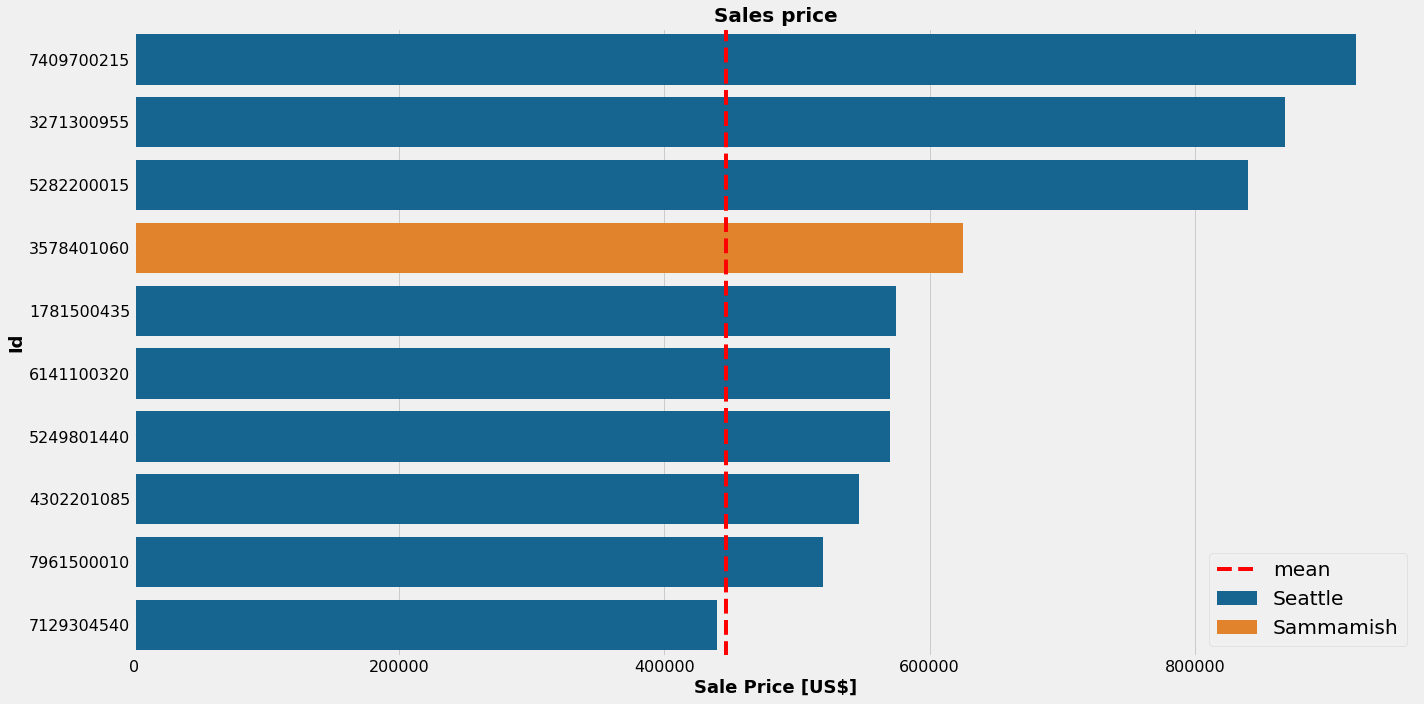

In [187]:
# Grafico de barras como preço das casas com maior lucro na venda
data_barplot2 = data_barplot.sort_values(by='price', ascending=False)
order_list2 = data_barplot2['id']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))

ax = sns.barplot(x='price', y='id', hue='city', 
                 data=data_barplot2, orient='h', order=order_list2, dodge=False)

plt.title(label='Sales price', fontweight='bold', fontsize=20)
plt.xlabel(xlabel='Sale Price [US$]', fontweight='bold', fontsize=18)
plt.ylabel(ylabel='Id', fontweight='bold', fontsize=18)
plt.tick_params(labelsize=16)
plt.axvline(x=446231.33149389044, color='r', linestyle='--', label='mean')
plt.legend(loc=4, fontsize='x-large')
plt.tight_layout()
plt.show()

In [149]:
# Analisando as casas com lucro acima da media de lucro e casas com preço de venda abaixo da media de preço
dupli_grp[(dupli_grp['price'] <= 446231) &
          (dupli_grp['diff'] >= 134042.83823529413)
         ].head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_lot,price/sqft_living,city,dupli_id,diff
13054,7129304540,2015-05-14,440000.0,5,2.00,1430,5600,1.5,0,0,3,6,1430,0,1947,0,98118,47.5192,-122.266,1860,5980,78.571429,307.692308,Seattle,True,307000.0
8135,1219000473,2015-03-23,371000.0,3,1.75,1570,15330,1.0,0,0,3,7,1080,490,1956,0,98166,47.4608,-122.340,1250,13330,24.200913,236.305732,Burien,True,206050.0
7434,3739500096,2015-05-05,430000.0,3,2.00,1540,6000,1.0,0,0,4,6,1540,0,1953,0,98155,47.7372,-122.307,1490,8213,71.666667,279.220779,Des Moines,True,201000.0
8506,6623400187,2015-02-20,365000.0,4,1.00,1760,8906,1.0,0,0,3,7,1230,530,1966,0,98055,47.4288,-122.198,1180,10407,40.983607,207.386364,Renton,True,180000.0
9903,7230400400,2015-03-26,415500.0,3,2.00,1220,17652,1.0,0,0,4,7,1220,0,1980,0,98059,47.4712,-122.100,1990,17652,23.538409,340.573770,Des Moines,True,175500.0
3200,4364700600,2015-03-30,390000.0,3,1.00,1010,7920,1.0,0,0,3,6,1010,0,1925,0,98126,47.5249,-122.370,1520,7560,49.242424,386.138614,Seattle,True,174000.0
1542,2143700830,2015-03-12,370000.0,4,2.50,2100,19680,1.5,0,0,3,6,2100,0,1914,0,98055,47.4787,-122.230,1340,12300,18.800813,176.190476,Renton,True,163000.0
12775,4202400078,2015-04-28,335000.0,2,1.00,1410,7000,1.0,0,0,3,7,1410,0,1968,0,98055,47.4908,-122.223,1540,6000,47.857143,237.588652,Renton,True,160000.0
10241,1217000340,2015-02-19,340000.0,3,1.00,1840,8100,1.0,0,0,4,7,920,920,1953,0,98166,47.4550,-122.350,1250,8100,41.975309,184.782609,Burien,True,155000.0
8448,2422049104,2014-12-30,235000.0,2,1.00,830,9000,1.0,0,0,3,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680,26.111111,283.132530,Kent,True,150000.0


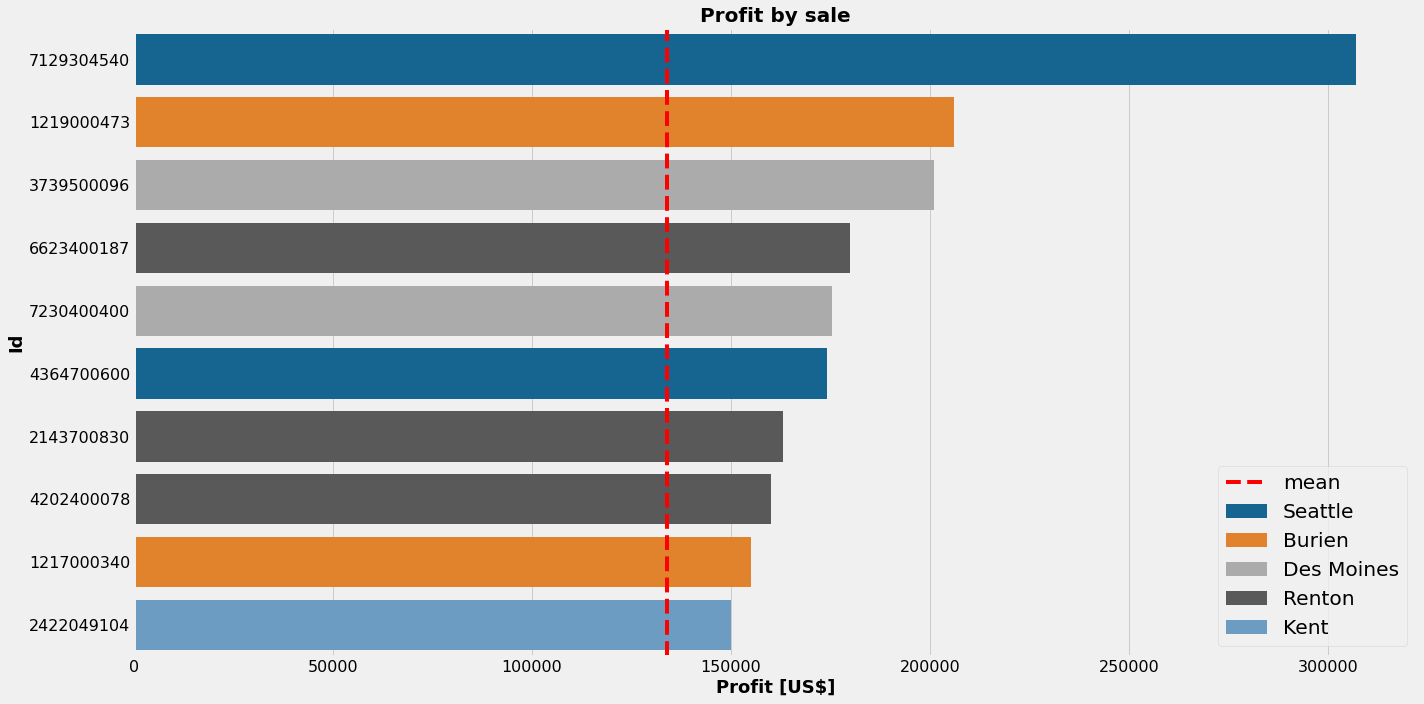

In [163]:
# Grafico de barras do lucro na venda casas com lucro acima da media de lucro e 
#preço de venda abaixo da media de preço
data_barplot3 = dupli_grp[(dupli_grp['price'] <= 446231) &
          (dupli_grp['diff'] >= 134042.83823529413)
         ].head(10)
order_list3 = data_barplot3['id']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))

ax = sns.barplot(x='diff', y='id', hue='city', 
                 data=data_barplot3, orient='h', order=order_list3, dodge=False)

plt.title(label='Profit by sale', fontweight='bold', fontsize=20)
plt.xlabel(xlabel='Profit [US$]', fontweight='bold', fontsize=18)
plt.ylabel(ylabel='Id', fontweight='bold', fontsize=18)
plt.tick_params(labelsize=16)
plt.axvline(x=134042.83823529413, color='r', linestyle='--', label='mean')
plt.legend(loc=4, fontsize='x-large')
plt.tight_layout()
plt.show()

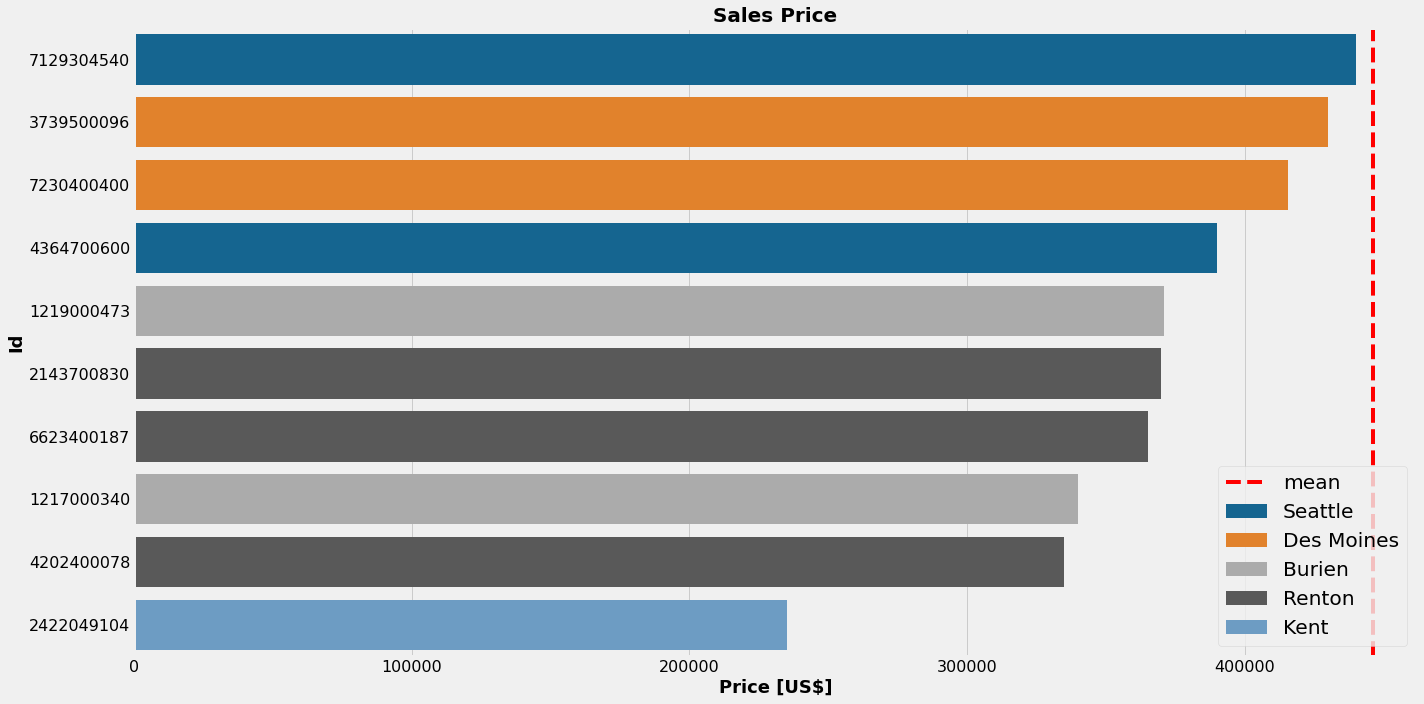

In [188]:
# Grafico de barras do preço das casas com lucro acima da media de lucro e 
#preço de venda abaixo da media de preço
data_barplot4 = data_barplot3.sort_values(by='price', ascending=False).head(10)
order_list4 = data_barplot4['id']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))

ax = sns.barplot(x='price', y='id', hue='city', 
                 data=data_barplot4, orient='h', order=order_list4, dodge=False)

plt.title(label='Sales Price', fontweight='bold', fontsize=20)
plt.xlabel(xlabel='Price [US$]', fontweight='bold', fontsize=18)
plt.ylabel(ylabel='Id', fontweight='bold', fontsize=18)
plt.tick_params(labelsize=16)
plt.axvline(x=446231.33149389044, color='r', linestyle='--', label='mean')
plt.legend(loc=4, fontsize='x-large')
plt.tight_layout()
plt.show()

In [181]:
# Analisando as casas com lucro abaixo da media de lucro e casas com preço de venda acima 
#da media de preço
dupli_grp[~(dupli_grp['price'] <= 446231) &
          ~(dupli_grp['diff'] >= 134042.83823529413) &
          (dupli_grp['diff'] != 0)
         ].sort_values(by='diff').head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price/sqft_lot,price/sqft_living,city,dupli_id,diff
8744,2767603612,2015-01-13,489000.0,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,366.566717,379.069767,Seattle,True,-11000.0
5239,9222400605,2015-04-11,850000.0,5,4.00,2980,4500,1.5,0,0,3,7,2070,910,1921,0,98115,47.6736,-122.323,1560,4225,188.888889,285.234899,Seattle,True,7500.0
1218,3630120700,2015-01-07,765000.0,3,3.25,3190,5283,2.0,0,0,3,9,3190,0,2007,0,98029,47.5534,-122.002,2950,5198,144.804089,239.811912,Des Moines,True,8000.0
9253,8161020060,2015-04-14,471000.0,4,2.50,2040,21781,2.0,0,0,3,8,2040,0,1994,0,98014,47.6458,-121.904,2410,21781,21.624351,230.882353,Carnation,True,27500.0
17734,7853420110,2015-05-04,625000.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,104.166667,224.820144,Des Moines,True,30134.0
11745,1250201165,2015-03-17,474500.0,5,2.50,2000,3600,1.0,0,0,3,6,1150,850,1987,0,98144,47.5971,-122.295,1410,3600,131.805556,237.250000,Seattle,True,33500.0
16639,7853400250,2015-02-19,645000.0,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,122.623574,221.649485,Des Moines,True,35000.0
14758,6791200120,2015-04-07,515000.0,3,2.25,1820,13362,1.0,0,0,3,8,1220,600,1977,0,98075,47.5898,-122.052,2050,15000,38.542134,282.967033,Sammamish,True,35000.0
9936,1036400200,2015-04-29,697000.0,4,1.75,1670,13125,1.0,0,0,5,8,1670,0,1973,0,98052,47.6315,-122.101,2360,12500,53.104762,417.365269,Des Moines,True,36000.0
17018,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,90.630078,187.313433,Des Moines,True,52010.0


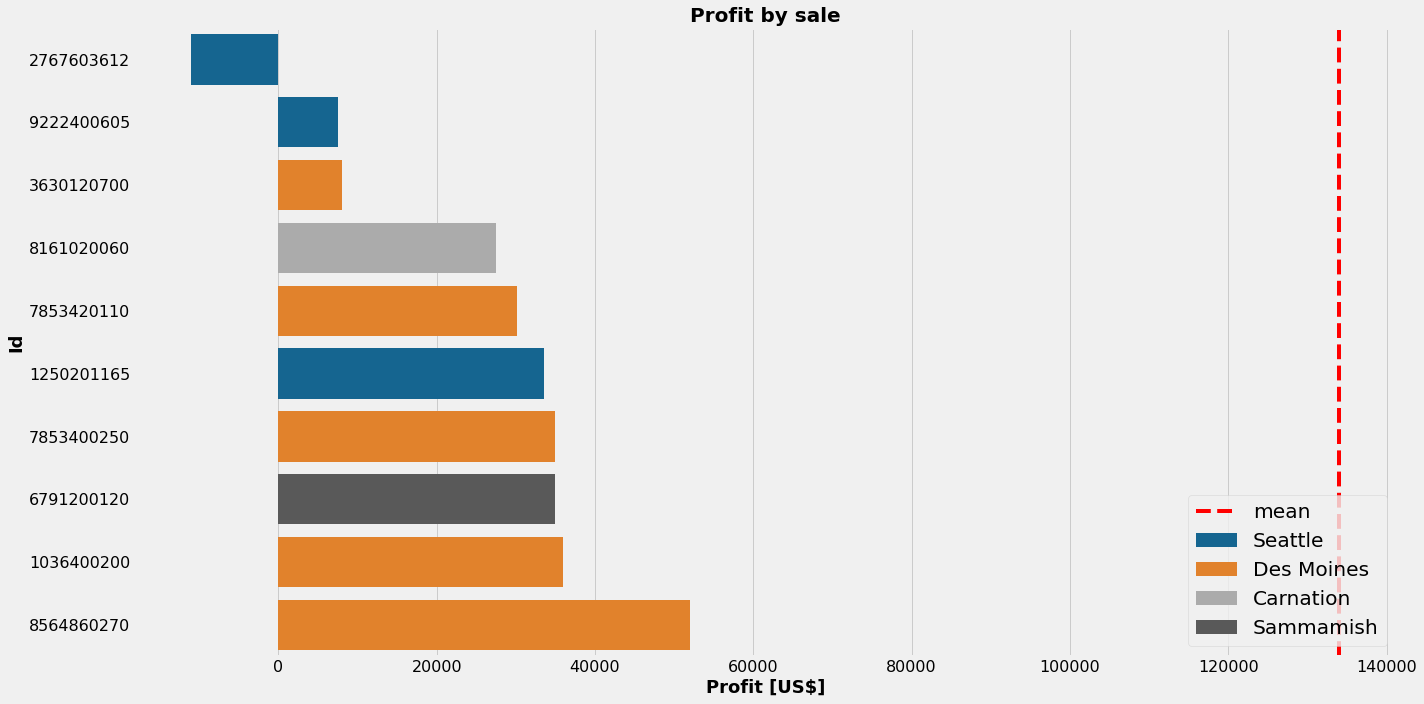

In [182]:
# Grafico de barras do lucro na venda casas com lucro abaixo da media de lucro e 
#preço de venda acima da media de preço
data_barplot5 = dupli_grp[~(dupli_grp['price'] <= 446231) &
          ~(dupli_grp['diff'] >= 134042.83823529413) &
          (dupli_grp['diff'] != 0)
         ].sort_values(by='diff').head(10)
order_list5 = data_barplot5['id']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))

ax = sns.barplot(x='diff', y='id', hue='city', 
                 data=data_barplot5, orient='h', order=order_list5, dodge=False)

plt.title(label='Profit by sale', fontweight='bold', fontsize=20)
plt.xlabel(xlabel='Profit [US$]', fontweight='bold', fontsize=18)
plt.ylabel(ylabel='Id', fontweight='bold', fontsize=18)
plt.tick_params(labelsize=16)
plt.axvline(x=134042.83823529413, color='r', linestyle='--', label='mean')
plt.legend(loc=4, fontsize='x-large')
plt.tight_layout()
plt.show()

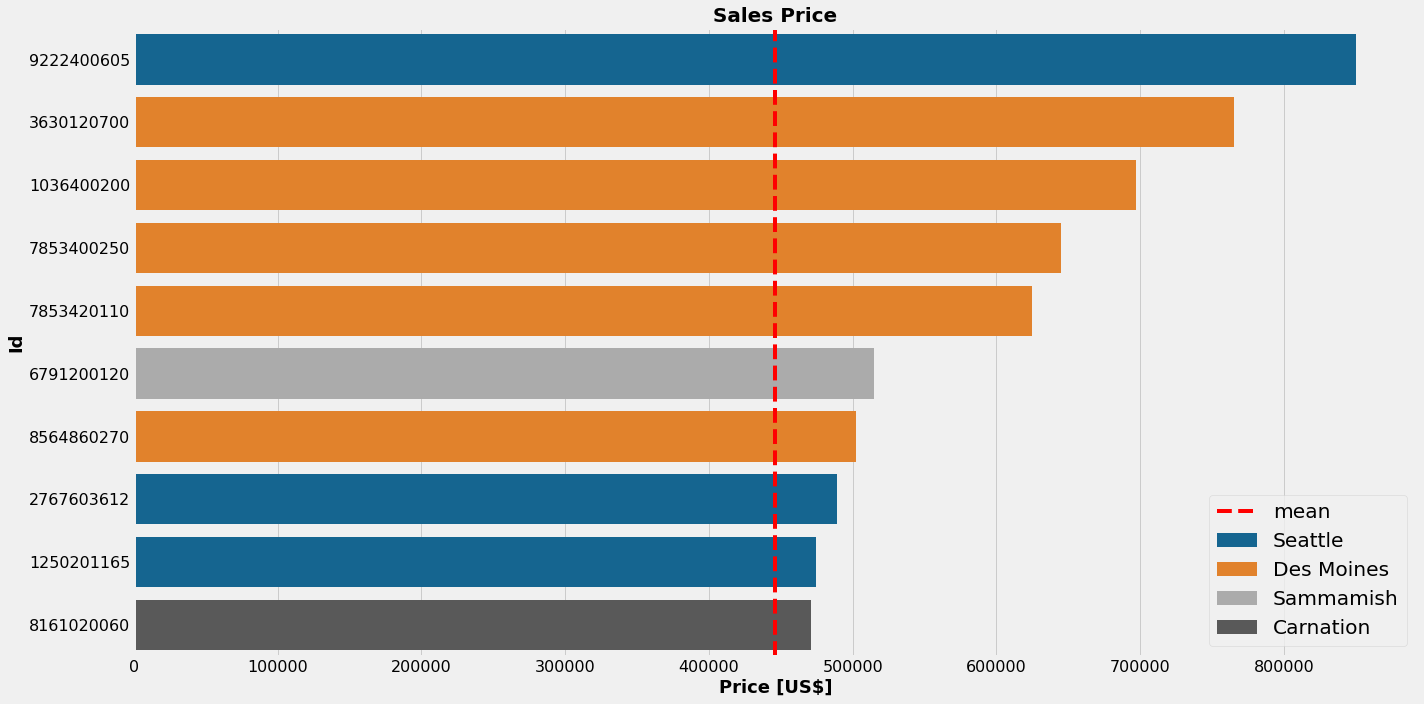

In [189]:
# Grafico de barras do preço das casas com lucro abaixo da media de lucro e 
#preço de venda acima da media de preço
data_barplot6 = data_barplot5.sort_values(by='price', ascending=False).head(10)
order_list6 = data_barplot6['id']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(20,10))

ax = sns.barplot(x='price', y='id', hue='city', 
                 data=data_barplot6, orient='h', order=order_list6, dodge=False)

plt.title(label='Sales Price', fontweight='bold', fontsize=20)
plt.xlabel(xlabel='Price [US$]', fontweight='bold', fontsize=18)
plt.ylabel(ylabel='Id', fontweight='bold', fontsize=18)
plt.tick_params(labelsize=16)
plt.axvline(x=446231.33149389044, color='r', linestyle='--', label='mean')
plt.legend(loc=4, fontsize='x-large')
plt.tight_layout()
plt.show()